In [1]:
import warnings

import pandas as pd
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

import numpy as np
import datetime

pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)
pd.options.display.max_rows = 50

In [2]:
# Load the processed quaternions data
qua_path = "/Users/niharawarawita/Desktop/MSc Project/Data/EMG_data_collection/qua_combined_stats.csv"
qua_df = pd.read_csv(qua_path)
qua_df.head()


,id,p_id,itr_id,prj_id,ppt_id,clt_id,hand,w,x,y,z,AVx,AVy,AVz,AAx,AAy,AAz,AJx,AJy,AJz,timestamp
0,212444,19,119,622,16,27,1,0.897418,0.059799,-0.405298,0.163701,0.354371,-0.138088,-0.140597,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022-02-13 11:24:11.316
1,212445,19,119,622,16,27,0,0.050747,0.424152,-0.057506,0.902337,-0.477546,-0.222190,-4.942065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022-02-13 11:24:11.326
2,212446,19,119,622,16,27,1,0.899481,0.057231,-0.400058,0.166167,-0.233459,0.107971,0.117765,-18.369691,7.689314,8.073829,-574.052834,240.291077,252.307168,2022-02-13 11:24:11.348
3,212447,19,119,622,16,27,0,0.091317,0.417244,-0.069474,0.901522,-0.386306,-0.333672,-1.060516,2.943233,-3.596196,125.211266,94.943007,-116.006335,4039.073106,2022-02-13 11:24:11.357
4,212448,19,119,622,16,27,1,0.900094,0.055599,-0.397422,0.169693,-0.152659,0.175423,0.231199,2.885740,2.409032,4.051195,759.122513,-188.581511,-143.665506,2022-02-13 11:24:11.376


In [3]:
# Load the processed emg data
emg_path = "/Users/niharawarawita/Desktop/MSc Project/Data/EMG_data_collection/emg_combined_stats.csv"
emg_df = pd.read_csv(emg_path)
emg_df.head()

,new_id,id,p_id,itr_id,prj_id,ppt_id,rating,hand,clt_id,ch_01,ch_02,ch_03,ch_04,ch_05,ch_06,ch_07,ch_08,timestamp
0,1,132383,19,119,622,16,6,0,27,0.001062,0.003030,0.002932,0.006998,0.010902,0.016429,0.024816,0.034724,2022-02-13 11:24:11.302
1,2,132383,19,119,622,16,6,0,27,0.001062,0.011202,0.002932,0.001948,0.002860,0.000817,0.015065,0.004675,2022-02-13 11:24:11.302
2,3,132383,19,119,622,16,6,0,27,0.001062,0.003030,0.002932,0.001948,0.002860,0.014796,0.004439,0.024374,2022-02-13 11:24:11.302
3,4,132383,19,119,622,16,6,0,27,0.001062,0.003030,0.006901,0.001948,0.002860,0.014796,0.005313,0.044074,2022-02-13 11:24:11.302
4,5,132383,19,119,622,16,6,0,27,0.001062,0.003030,0.002932,0.001948,0.002860,0.014796,0.005313,0.004675,2022-02-13 11:24:11.302


In [4]:
# Load the processed accellerometer data
acc_path = "/Users/niharawarawita/Desktop/MSc Project/Data/EMG_data_collection/acc_combined_stats.csv"
acc_df = pd.read_csv(acc_path)
acc_df.head()

,id,p_id,itr_id,prj_id,ppt_id,rating,hand,clt_id,Ax,Ay,Az,Vx,Vy,Vz,Jx,Jy,Jz,timestamp
0,261349,19,152,622,12,2,0,25,0.246597,-0.457504,0.711624,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022-02-13 12:00:21.557
1,261351,19,152,622,12,2,0,25,0.292984,-0.449203,0.783890,0.000974,0.000174,0.001518,2.208891,0.395275,3.441220,2022-02-13 12:00:21.578
2,261934,19,152,622,12,2,0,25,0.298355,-0.512192,0.779984,0.032339,-0.379252,-0.023520,0.000892,-0.010461,-0.000649,2022-02-13 12:00:27.599
3,261940,19,152,622,12,2,0,25,0.304703,-0.507309,0.790726,0.000355,0.000273,0.000602,0.113351,0.087193,0.191825,2022-02-13 12:00:27.655
4,262034,19,152,622,12,2,0,25,0.305191,-0.472641,0.733597,0.000500,0.035465,-0.058443,0.000477,0.033889,-0.055844,2022-02-13 12:00:28.678


### Rename the required columns

In [5]:
qua_df.rename(columns={'p_id': 'participant_id', 'itr_id': 'interaction_id',  'prj_id': 'project_id',  'ppt_id': 'property_id', 'clt_id': 'clothes_id'}, inplace=True)
qua_df.head()

,id,participant_id,interaction_id,project_id,property_id,clothes_id,hand,w,x,y,z,AVx,AVy,AVz,AAx,AAy,AAz,AJx,AJy,AJz,timestamp
0,212444,19,119,622,16,27,1,0.897418,0.059799,-0.405298,0.163701,0.354371,-0.138088,-0.140597,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022-02-13 11:24:11.316
1,212445,19,119,622,16,27,0,0.050747,0.424152,-0.057506,0.902337,-0.477546,-0.222190,-4.942065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022-02-13 11:24:11.326
2,212446,19,119,622,16,27,1,0.899481,0.057231,-0.400058,0.166167,-0.233459,0.107971,0.117765,-18.369691,7.689314,8.073829,-574.052834,240.291077,252.307168,2022-02-13 11:24:11.348
3,212447,19,119,622,16,27,0,0.091317,0.417244,-0.069474,0.901522,-0.386306,-0.333672,-1.060516,2.943233,-3.596196,125.211266,94.943007,-116.006335,4039.073106,2022-02-13 11:24:11.357
4,212448,19,119,622,16,27,1,0.900094,0.055599,-0.397422,0.169693,-0.152659,0.175423,0.231199,2.885740,2.409032,4.051195,759.122513,-188.581511,-143.665506,2022-02-13 11:24:11.376


In [6]:
emg_df.rename(columns={'p_id': 'participant_id', 'itr_id': 'interaction_id',  'prj_id': 'project_id',  'ppt_id': 'property_id', 'clt_id': 'clothes_id'}, inplace=True)
emg_df.head()

,new_id,id,participant_id,interaction_id,project_id,property_id,rating,hand,clothes_id,ch_01,ch_02,ch_03,ch_04,ch_05,ch_06,ch_07,ch_08,timestamp
0,1,132383,19,119,622,16,6,0,27,0.001062,0.003030,0.002932,0.006998,0.010902,0.016429,0.024816,0.034724,2022-02-13 11:24:11.302
1,2,132383,19,119,622,16,6,0,27,0.001062,0.011202,0.002932,0.001948,0.002860,0.000817,0.015065,0.004675,2022-02-13 11:24:11.302
2,3,132383,19,119,622,16,6,0,27,0.001062,0.003030,0.002932,0.001948,0.002860,0.014796,0.004439,0.024374,2022-02-13 11:24:11.302
3,4,132383,19,119,622,16,6,0,27,0.001062,0.003030,0.006901,0.001948,0.002860,0.014796,0.005313,0.044074,2022-02-13 11:24:11.302
4,5,132383,19,119,622,16,6,0,27,0.001062,0.003030,0.002932,0.001948,0.002860,0.014796,0.005313,0.004675,2022-02-13 11:24:11.302


In [7]:
acc_df.rename(columns={'p_id': 'participant_id', 'itr_id': 'interaction_id',  'prj_id': 'project_id',  'ppt_id': 'property_id', 'clt_id': 'clothes_id'}, inplace=True)
acc_df.head()

,id,participant_id,interaction_id,project_id,property_id,rating,hand,clothes_id,Ax,Ay,Az,Vx,Vy,Vz,Jx,Jy,Jz,timestamp
0,261349,19,152,622,12,2,0,25,0.246597,-0.457504,0.711624,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022-02-13 12:00:21.557
1,261351,19,152,622,12,2,0,25,0.292984,-0.449203,0.783890,0.000974,0.000174,0.001518,2.208891,0.395275,3.441220,2022-02-13 12:00:21.578
2,261934,19,152,622,12,2,0,25,0.298355,-0.512192,0.779984,0.032339,-0.379252,-0.023520,0.000892,-0.010461,-0.000649,2022-02-13 12:00:27.599
3,261940,19,152,622,12,2,0,25,0.304703,-0.507309,0.790726,0.000355,0.000273,0.000602,0.113351,0.087193,0.191825,2022-02-13 12:00:27.655
4,262034,19,152,622,12,2,0,25,0.305191,-0.472641,0.733597,0.000500,0.035465,-0.058443,0.000477,0.033889,-0.055844,2022-02-13 12:00:28.678


### Check if the dfs contain NA values

In [8]:
qua_df.isna().sum()

id                0
participant_id    0
interaction_id    0
project_id        0
property_id       0
clothes_id        0
hand              0
w                 0
x                 0
y                 0
z                 0
AVx               0
AVy               0
AVz               0
AAx               0
AAy               0
AAz               0
AJx               0
AJy               0
AJz               0
timestamp         0
dtype: int64

In [9]:
emg_df.isna().sum()

new_id            0
id                0
participant_id    0
interaction_id    0
project_id        0
property_id       0
rating            0
hand              0
clothes_id        0
ch_01             0
ch_02             0
ch_03             0
ch_04             0
ch_05             0
ch_06             0
ch_07             0
ch_08             0
timestamp         0
dtype: int64

In [10]:
acc_df.isna().sum()

id                0
participant_id    0
interaction_id    0
project_id        0
property_id       0
rating            0
hand              0
clothes_id        0
Ax                0
Ay                0
Az                0
Vx                0
Vy                0
Vz                0
Jx                0
Jy                0
Jz                0
timestamp         0
dtype: int64

### Drop the required columns

In [11]:
qua_df.drop(['id'], axis=1, inplace=True)
qua_df.head()

,participant_id,interaction_id,project_id,property_id,clothes_id,hand,w,x,y,z,AVx,AVy,AVz,AAx,AAy,AAz,AJx,AJy,AJz,timestamp
0,19,119,622,16,27,1,0.897418,0.059799,-0.405298,0.163701,0.354371,-0.138088,-0.140597,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022-02-13 11:24:11.316
1,19,119,622,16,27,0,0.050747,0.424152,-0.057506,0.902337,-0.477546,-0.222190,-4.942065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022-02-13 11:24:11.326
2,19,119,622,16,27,1,0.899481,0.057231,-0.400058,0.166167,-0.233459,0.107971,0.117765,-18.369691,7.689314,8.073829,-574.052834,240.291077,252.307168,2022-02-13 11:24:11.348
3,19,119,622,16,27,0,0.091317,0.417244,-0.069474,0.901522,-0.386306,-0.333672,-1.060516,2.943233,-3.596196,125.211266,94.943007,-116.006335,4039.073106,2022-02-13 11:24:11.357
4,19,119,622,16,27,1,0.900094,0.055599,-0.397422,0.169693,-0.152659,0.175423,0.231199,2.885740,2.409032,4.051195,759.122513,-188.581511,-143.665506,2022-02-13 11:24:11.376


In [12]:
emg_df.drop(['new_id', 'id'], axis=1, inplace=True)
emg_df.head()

,participant_id,interaction_id,project_id,property_id,rating,hand,clothes_id,ch_01,ch_02,ch_03,ch_04,ch_05,ch_06,ch_07,ch_08,timestamp
0,19,119,622,16,6,0,27,0.001062,0.003030,0.002932,0.006998,0.010902,0.016429,0.024816,0.034724,2022-02-13 11:24:11.302
1,19,119,622,16,6,0,27,0.001062,0.011202,0.002932,0.001948,0.002860,0.000817,0.015065,0.004675,2022-02-13 11:24:11.302
2,19,119,622,16,6,0,27,0.001062,0.003030,0.002932,0.001948,0.002860,0.014796,0.004439,0.024374,2022-02-13 11:24:11.302
3,19,119,622,16,6,0,27,0.001062,0.003030,0.006901,0.001948,0.002860,0.014796,0.005313,0.044074,2022-02-13 11:24:11.302
4,19,119,622,16,6,0,27,0.001062,0.003030,0.002932,0.001948,0.002860,0.014796,0.005313,0.004675,2022-02-13 11:24:11.302


In [13]:
acc_df.drop(['id'], axis=1, inplace=True)
acc_df.head()

,participant_id,interaction_id,project_id,property_id,rating,hand,clothes_id,Ax,Ay,Az,Vx,Vy,Vz,Jx,Jy,Jz,timestamp
0,19,152,622,12,2,0,25,0.246597,-0.457504,0.711624,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022-02-13 12:00:21.557
1,19,152,622,12,2,0,25,0.292984,-0.449203,0.783890,0.000974,0.000174,0.001518,2.208891,0.395275,3.441220,2022-02-13 12:00:21.578
2,19,152,622,12,2,0,25,0.298355,-0.512192,0.779984,0.032339,-0.379252,-0.023520,0.000892,-0.010461,-0.000649,2022-02-13 12:00:27.599
3,19,152,622,12,2,0,25,0.304703,-0.507309,0.790726,0.000355,0.000273,0.000602,0.113351,0.087193,0.191825,2022-02-13 12:00:27.655
4,19,152,622,12,2,0,25,0.305191,-0.472641,0.733597,0.000500,0.035465,-0.058443,0.000477,0.033889,-0.055844,2022-02-13 12:00:28.678


In [14]:
# Convert the timestamp to the datetime format
qua_df['timestamp']= pd.to_datetime(qua_df['timestamp'])
emg_df['timestamp']= pd.to_datetime(emg_df['timestamp'])
acc_df['timestamp']= pd.to_datetime(acc_df['timestamp'])

In [15]:
# Sort the values in each df by ascending value of the timestamp
qua_df.sort_values(by=['timestamp'], inplace=True)
emg_df.sort_values(by=['timestamp'], inplace=True)
acc_df.sort_values(by=['timestamp'], inplace=True)

In [16]:
# Split the data into hands 0 (left) and 1 (right)
qua_0 = qua_df[qua_df.hand == 0]
qua_1 = qua_df[qua_df.hand == 1]

emg_0 = emg_df[emg_df.hand == 0]
emg_1 = emg_df[emg_df.hand == 1]

acc_0 = acc_df[acc_df.hand == 0]
acc_1 = acc_df[acc_df.hand == 1]

In [17]:
# Reset indexes
qua_0.reset_index(inplace=True, drop = True)
qua_1.reset_index(inplace=True, drop = True)

emg_0.reset_index(inplace=True, drop = True)
emg_1.reset_index(inplace=True, drop = True)

acc_0.reset_index(inplace=True, drop = True)
acc_1.reset_index(inplace=True, drop = True)

In [18]:
def interaction_time(df):
    # Create a column for the starting time of each interaction 
    df['interaction_start_time'] = df['timestamp'].groupby(df['interaction_id']).transform('min')
    # Create a column for the ending time of each interaction 
    df['interaction_end_time'] = df['timestamp'].groupby(df['interaction_id']).transform('max')
    
    df['interaction_duration'] = df['interaction_end_time'] - df['interaction_start_time']#.datetime.total_seconds()
    df['interaction_duration'] = df['interaction_duration'].dt.total_seconds()
    return df

qua_0 = interaction_time(qua_0)
qua_1 = interaction_time(qua_1)

emg_0 = interaction_time(emg_0)
emg_1 = interaction_time(emg_1)

acc_0 = interaction_time(acc_0)
acc_1 = interaction_time(acc_1)


#### (a) qua

In [19]:
# What interaction ids have an interaction_duration >17s or <13s? - Quaternions
qua_0[qua_0.interaction_duration < 13]['interaction_id'].unique()
a = qua_0[qua_0.interaction_id==296]['interaction_duration'].mean()
b = qua_0[qua_0.interaction_id==303]['interaction_duration'].mean()
print(f'Hand 0 <13s: 296({round(a,2)}s) and 303({round(b,2)}s)')

qua_0[qua_0.interaction_duration > 17]['interaction_id'].unique()
c = qua_0[qua_0.interaction_id==191]['interaction_duration'].mean()
d = qua_0[qua_0.interaction_id==196]['interaction_duration'].mean()
e = qua_0[qua_0.interaction_id==215]['interaction_duration'].mean()
print(f'Hand 0 >17s: 191({round(c,2)}s), 196({round(d,2)}s) and 215({round(e,2)}s)')

qua_1[qua_1.interaction_duration < 13]['interaction_id'].unique()
print(f'Hand 1 <13s: Nothing')

qua_1[qua_1.interaction_duration > 17]['interaction_id'].unique()
f = qua_1[qua_1.interaction_id==191]['interaction_duration'].mean()
g = qua_1[qua_1.interaction_id==196]['interaction_duration'].mean()
h = qua_1[qua_1.interaction_id==215]['interaction_duration'].mean()
i = qua_1[qua_1.interaction_id==296]['interaction_duration'].mean()
j = qua_1[qua_1.interaction_id==303]['interaction_duration'].mean()
print(f'Hand 1 >17s: 191({round(f,2)}s), 196({round(g,2)}s), 215({round(h,2)}s), 296({round(i,2)}s) and 303({round(j,2)}s)')

Hand 0 <13s: 296(8.41s) and 303(7.85s)
Hand 0 >17s: 191(96.52s), 196(51.66s) and 215(22.89s)
Hand 1 <13s: Nothing
Hand 1 >17s: 191(96.43s), 196(51.62s), 215(22.79s), 296(79.27s) and 303(45.85s)


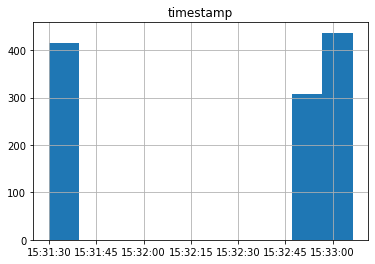

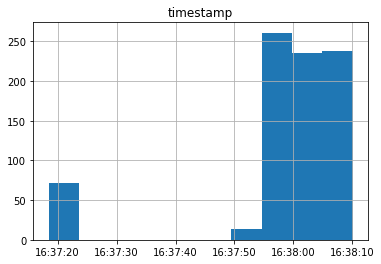

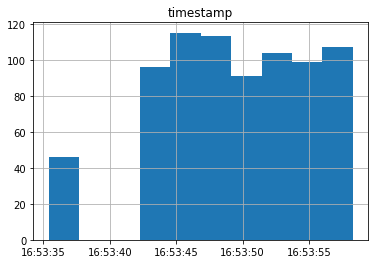

In [20]:
# qua - hand 0
# Look at the frequency distributions for interaction_ids 191, 196 and 296 for hand 0
qua_191_0 = qua_0[qua_0.interaction_id==191]
qua_191_0.hist(column='timestamp')

qua_196_0 = qua_0[qua_0.interaction_id==196]
qua_196_0.hist(column='timestamp')

qua_215_0 = qua_0[qua_0.interaction_id==215]
qua_215_0.hist(column='timestamp')

def qua_get_15_seconds(interaction_id, qua_interaction_df, qua_df):
    interaction_end_time = qua_interaction_df.iloc[0,21]
    threshold = interaction_end_time - datetime.timedelta(0,16)

    # Remove rows with interaction_id with a timestamp less than the threshold from the dfs
    qua_df.drop(qua_df[(qua_df.interaction_id==interaction_id) & (qua_df.timestamp<=threshold)].index, inplace=True)
    
    # Drop the interaction_start_time and interaction_end_time for the dfs
    qua_df.drop(['interaction_start_time', 'interaction_end_time'], axis=1, inplace=True)

    # Recalculate the columns
    qua_df = interaction_time(qua_df)
     
    return qua_df

qua_0 = qua_get_15_seconds(191, qua_191_0, qua_0)        
qua_0 = qua_get_15_seconds(196, qua_196_0, qua_0) 
qua_0 = qua_get_15_seconds(215, qua_215_0, qua_0) 


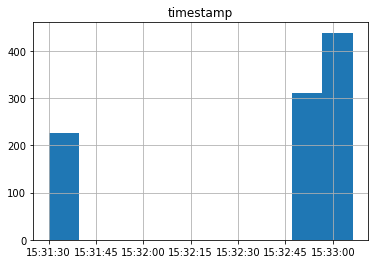

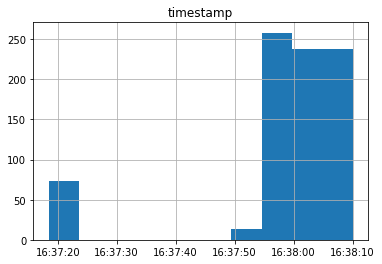

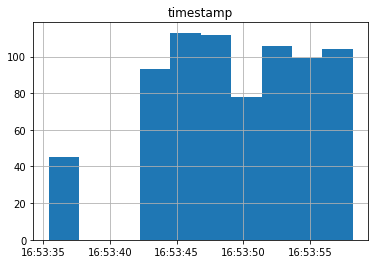

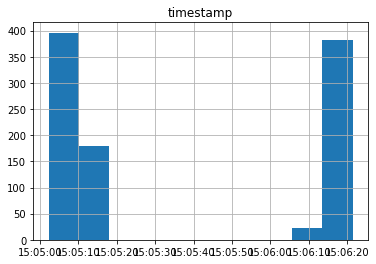

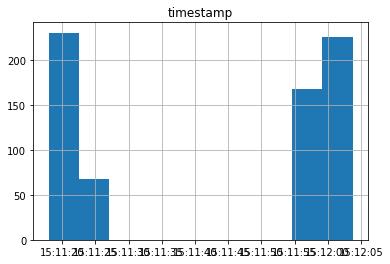

In [21]:
#qua - hand 1
# Look at the frequency distributions for interaction_ids 191, 196 and 296 for hand 0
qua_191_1 = qua_1[qua_1.interaction_id==191]
qua_191_1.hist(column='timestamp')

qua_196_1 = qua_1[qua_1.interaction_id==196]
qua_196_1.hist(column='timestamp')

qua_215_1 = qua_1[qua_1.interaction_id==215]
qua_215_1.hist(column='timestamp')

qua_296_1 = qua_1[qua_1.interaction_id==296]
qua_296_1.hist(column='timestamp')

qua_303_1 = qua_1[qua_1.interaction_id==303]
qua_303_1.hist(column='timestamp')

qua_1 = qua_get_15_seconds(191, qua_191_1, qua_1)        
qua_1 = qua_get_15_seconds(196, qua_196_1, qua_1) 
qua_1 = qua_get_15_seconds(215, qua_215_1, qua_1) 
qua_1 = qua_get_15_seconds(296, qua_296_1, qua_1) 
qua_1 = qua_get_15_seconds(303, qua_303_1, qua_1)

#### (b) emg

In [22]:
# For emg
emg_0[emg_0.interaction_duration < 13]['interaction_id'].unique()
a = emg_0[emg_0.interaction_id==296]['interaction_duration'].mean()
print(f'Hand 0 <13s: 296({round(a,2)}s)')

emg_0[emg_0.interaction_duration > 17]['interaction_id'].unique()
b = emg_0[emg_0.interaction_id==191]['interaction_duration'].mean()
c = emg_0[emg_0.interaction_id==196]['interaction_duration'].mean()
print(f'Hand 0 >17s: 191({round(b,2)}s) and 196({round(c,2)}s)')

emg_1[emg_1.interaction_duration < 13]['interaction_id'].unique()
print(f'Hand 1 <13s: Nothing')

emg_1[emg_1.interaction_duration > 17]['interaction_id'].unique()
d = emg_1[emg_1.interaction_id==191]['interaction_duration'].mean()
e = emg_1[emg_1.interaction_id==196]['interaction_duration'].mean()
f = emg_1[emg_1.interaction_id==296]['interaction_duration'].mean()
print(f'Hand 1 >17s: 191({round(d,2)}s), 196({round(e,2)}s), 296({round(f,2)}s)')

Hand 0 <13s: 296(8.3s)
Hand 0 >17s: 191(96.46s) and 196(51.68s)
Hand 1 <13s: Nothing
Hand 1 >17s: 191(96.49s), 196(51.68s), 296(79.17s)


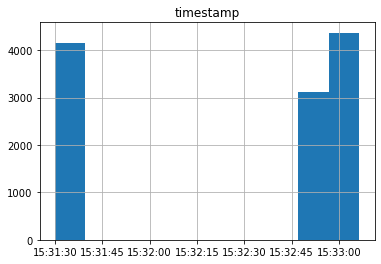

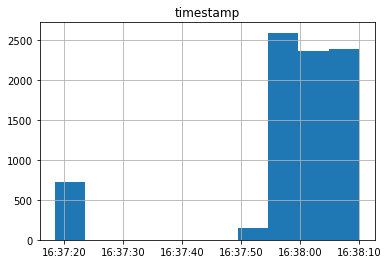

In [23]:
# emg - hand 0
# Look at the frequency distributions for interaction_ids 191, 196 and 296 for hand 0
emg_191_0 = emg_0[emg_0.interaction_id==191]
emg_191_0.hist(column='timestamp')

emg_196_0 = emg_0[emg_0.interaction_id==196]
emg_196_0.hist(column='timestamp')

def emg_get_15_seconds(interaction_id, emg_interaction_df, emg_df):
    interaction_end_time = emg_interaction_df.iloc[0,17]
    threshold = interaction_end_time - datetime.timedelta(0,16)

    # Remove rows with interaction_id with a timestamp less than the threshold from the dfs
    emg_df.drop(emg_df[(emg_df.interaction_id==interaction_id) & (emg_df.timestamp<=threshold)].index, inplace=True)
    
    # Drop the interaction_start_time and interaction_end_time for the dfs
    emg_df.drop(['interaction_start_time', 'interaction_end_time'], axis=1, inplace=True)

    # Recalculate the columns
    emg_df = interaction_time(emg_df)
     
    return emg_df

emg_0 = emg_get_15_seconds(191, emg_191_0, emg_0)        
emg_0 = emg_get_15_seconds(196, emg_196_0, emg_0) 


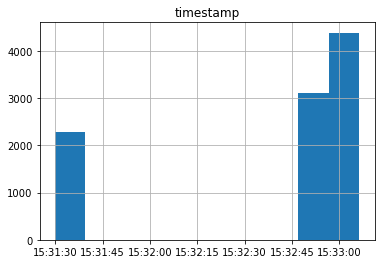

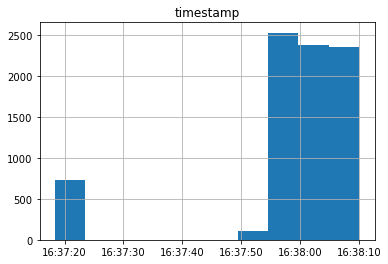

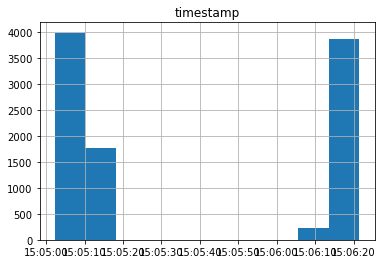

In [24]:
# emg - hand 1
# Look at the frequency distributions for interaction_ids 191, 196 and 296 for hand 0
emg_191_1 = emg_1[emg_1.interaction_id==191]
emg_191_1.hist(column='timestamp')

emg_196_1 = emg_1[emg_1.interaction_id==196]
emg_196_1.hist(column='timestamp')

emg_296_1 = emg_1[emg_1.interaction_id==296]
emg_296_1.hist(column='timestamp')

emg_1 = emg_get_15_seconds(191, emg_191_1, emg_1)        
emg_1 = emg_get_15_seconds(196, emg_196_1, emg_1)  
emg_1 = emg_get_15_seconds(296, emg_296_1, emg_1) 

#### (c) acc

In [25]:
# What interaction ids have an interaction_duration >17s or <13s? - Accellerometer
acc_0[acc_0.interaction_duration < 13]['interaction_id'].unique()
a = acc_0[acc_0.interaction_id==296]['interaction_duration'].mean()
b = acc_0[acc_0.interaction_id==303]['interaction_duration'].mean()
print(f'Hand 0 <13s: 296({round(a,2)}s) and 303({round(b,2)}s)')

acc_0[acc_0.interaction_duration > 17]['interaction_id'].unique()
c = acc_0[acc_0.interaction_id==191]['interaction_duration'].mean()
d = acc_0[acc_0.interaction_id==196]['interaction_duration'].mean()
e = acc_0[acc_0.interaction_id==215]['interaction_duration'].mean()
print(f'Hand 0 >17s: 191({round(c,2)}s), 196({round(d,2)}s) and 215({round(e,2)}s)')

acc_1[acc_1.interaction_duration < 13]['interaction_id'].unique()
print(f'Hand 1 <13s: Nothing')

acc_1[acc_1.interaction_duration > 17]['interaction_id'].unique()
f = acc_1[acc_1.interaction_id==191]['interaction_duration'].mean()
g = acc_1[acc_1.interaction_id==196]['interaction_duration'].mean()
h = acc_1[acc_1.interaction_id==215]['interaction_duration'].mean()
i = acc_1[acc_1.interaction_id==296]['interaction_duration'].mean()
j = acc_1[acc_1.interaction_id==303]['interaction_duration'].mean()
print(f'Hand 1 >17s: 191({round(f,2)}s), 196({round(g,2)}s), 215({round(h,2)}s), 296({round(i,2)}s) and 303({round(j,2)}s)')

Hand 0 <13s: 296(8.21s) and 303(7.91s)
Hand 0 >17s: 191(96.46s), 196(51.65s) and 215(22.88s)
Hand 1 <13s: Nothing
Hand 1 >17s: 191(96.43s), 196(51.62s), 215(22.78s), 296(79.21s) and 303(45.82s)


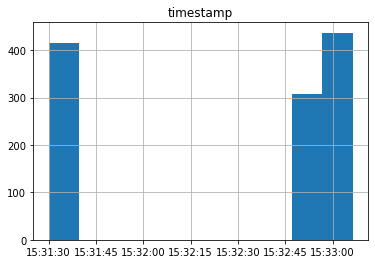

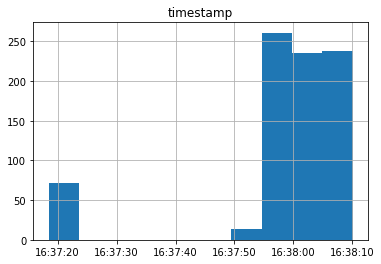

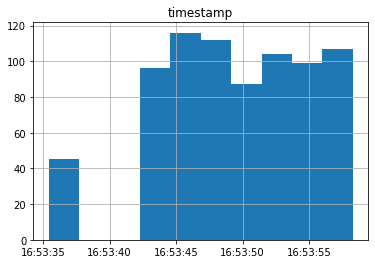

In [26]:
# acc - hand 0
# Look at the frequency distributions for interaction_ids 191, 196 and 296 for hand 0
acc_191_0 = acc_0[acc_0.interaction_id==191]
acc_191_0.hist(column='timestamp')

acc_196_0 = acc_0[acc_0.interaction_id==196]
acc_196_0.hist(column='timestamp')

acc_215_0 = acc_0[acc_0.interaction_id==215]
acc_215_0.hist(column='timestamp')

def acc_get_15_seconds(interaction_id, acc_interaction_df, acc_df):
    interaction_end_time = acc_interaction_df.iloc[0,18]
    threshold = interaction_end_time - datetime.timedelta(0,16)

    # Remove rows with interaction_id with a timestamp less than the threshold from the dfs
    acc_df.drop(acc_df[(acc_df.interaction_id==interaction_id) & (acc_df.timestamp<=threshold)].index, inplace=True)
    
    # Drop the interaction_start_time and interaction_end_time for the dfs
    acc_df.drop(['interaction_start_time', 'interaction_end_time'], axis=1, inplace=True)

    # Recalculate the columns
    acc_df = interaction_time(acc_df)
     
    return acc_df

acc_0 = acc_get_15_seconds(191, acc_191_0, acc_0)        
acc_0 = acc_get_15_seconds(196, acc_196_0, acc_0) 
acc_0 = acc_get_15_seconds(215, acc_215_0, acc_0) 


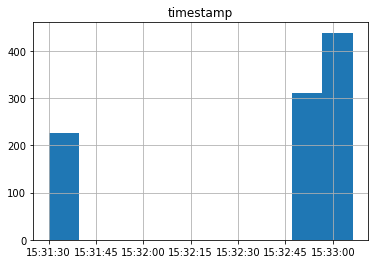

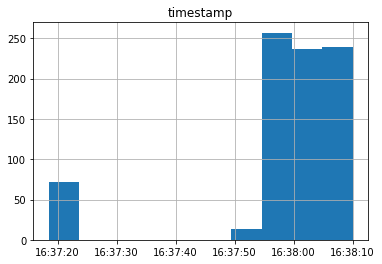

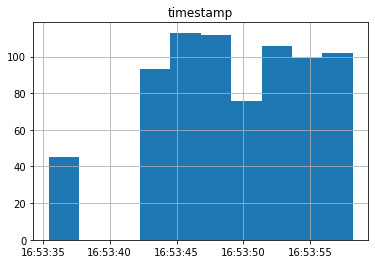

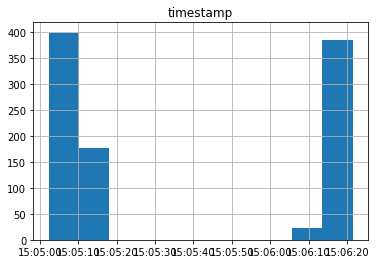

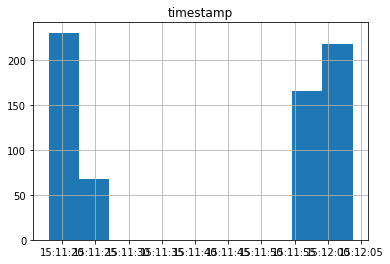

In [27]:
#acc - hand 1
# Look at the frequency distributions for interaction_ids 191, 196 and 296 for hand 0
acc_191_1 = acc_1[acc_1.interaction_id==191]
acc_191_1.hist(column='timestamp')

acc_196_1 = acc_1[acc_1.interaction_id==196]
acc_196_1.hist(column='timestamp')

acc_215_1 = acc_1[acc_1.interaction_id==215]
acc_215_1.hist(column='timestamp')

acc_296_1 = acc_1[acc_1.interaction_id==296]
acc_296_1.hist(column='timestamp')

acc_303_1 = acc_1[acc_1.interaction_id==303]
acc_303_1.hist(column='timestamp')

acc_1 = acc_get_15_seconds(191, acc_191_1, acc_1)        
acc_1 = acc_get_15_seconds(196, acc_196_1, acc_1) 
acc_1 = acc_get_15_seconds(215, acc_215_1, acc_1) 
acc_1 = acc_get_15_seconds(296, acc_296_1, acc_1) 
acc_1 = acc_get_15_seconds(303, acc_303_1, acc_1)

In [28]:
# Create subwindows - Each 15s interaction is split into 3 windows (5s each)
def create_subwindows(df):
    
    # Create a column with the subwindow numbers
    df['sub_window_num'] = 1
    df.sub_window_num[pd.to_datetime(df['timestamp']) >= pd.to_datetime(df['interaction_end_time']) - datetime.timedelta(0,10)] = 2
    df.sub_window_num[pd.to_datetime(df['timestamp']) >= pd.to_datetime(df['interaction_end_time']) - datetime.timedelta(0,5)] = 3
    
    # Create a column for the starting time of each subwindow 
    df['subwindow_start_time'] = df['timestamp'].groupby([df['interaction_id'], df['sub_window_num']]).transform('min')
    
    # Create a column for the ending time of each interaction 
    df['subwindow_end_time'] = df['timestamp'].groupby([df['interaction_id'], df['sub_window_num']]).transform('max')
    return df

qua_0 = create_subwindows(qua_0)
qua_1 = create_subwindows(qua_1)

emg_0 = create_subwindows(emg_0)
emg_1 = create_subwindows(emg_1)

acc_0 = create_subwindows(acc_0)
acc_1 = create_subwindows(acc_1)


In [29]:
# Calculate the stats (max, mean and std) for the raw features in qua_0 and qua_1
def calc_stats_qua(df, hand='Hand0', stat='max'):
    column_names = ['w','x','y','z','AVx','AVy','AVz','AAx','AAy','AAz','AJx','AJy','AJz']    
    new_col_names_lst = []
    for col in column_names:
        new_col_name = stat+'_'+col+'_'+hand
        new_col_names_lst.append(new_col_name)    
        df[new_col_name] = df[col].groupby([df['interaction_id'], df['sub_window_num']]).transform(stat)
    return df, new_col_names_lst
         
qua_0, qua_0_cols_lst_1 = calc_stats_qua(qua_0, hand='Hand0', stat='max')
qua_0, qua_0_cols_lst_2 = calc_stats_qua(qua_0, hand='Hand0', stat='mean')
qua_0, qua_0_cols_lst_3 = calc_stats_qua(qua_0, hand='Hand0', stat='std')
qua_0_cols_lst = qua_0_cols_lst_1 + qua_0_cols_lst_2 + qua_0_cols_lst_3

qua_1, qua_1_cols_lst_1 = calc_stats_qua(qua_1, hand='Hand1', stat='max')
qua_1, qua_1_cols_lst_2 = calc_stats_qua(qua_1, hand='Hand1', stat='mean')
qua_1, qua_1_cols_lst_3 = calc_stats_qua(qua_1, hand='Hand1', stat='std')
qua_1_cols_lst = qua_1_cols_lst_1 + qua_1_cols_lst_2 + qua_1_cols_lst_3


# Calculate the stats (max, mean and std) for the raw features in emg_0 and emg_1
def calc_stats_emg(df, hand='Hand0', stat='max'):
    column_names = ['ch_01','ch_02','ch_03','ch_04','ch_05','ch_06','ch_07','ch_08']
    new_col_names_lst = []
    for col in column_names:
        new_col_name = stat+'_'+col[:2]+col[4:]+'_'+hand
        new_col_names_lst.append(new_col_name)        
        df[new_col_name] = df[col].groupby([df['interaction_id'], df['sub_window_num']]).transform(stat)
    return df, new_col_names_lst

emg_0, emg_0_cols_lst_1 = calc_stats_emg(emg_0, hand='Hand0', stat='max')
emg_0, emg_0_cols_lst_2 = calc_stats_emg(emg_0, hand='Hand0', stat='mean')
emg_0, emg_0_cols_lst_3 = calc_stats_emg(emg_0, hand='Hand0', stat='std')
emg_0_cols_lst = emg_0_cols_lst_1 + emg_0_cols_lst_2 + emg_0_cols_lst_3

emg_1, emg_1_cols_lst_1 = calc_stats_emg(emg_1, hand='Hand1', stat='max')
emg_1, emg_1_cols_lst_2 = calc_stats_emg(emg_1, hand='Hand1', stat='mean')
emg_1, emg_1_cols_lst_3 = calc_stats_emg(emg_1, hand='Hand1', stat='std')
emg_1_cols_lst = emg_1_cols_lst_1 + emg_1_cols_lst_2 + emg_1_cols_lst_3


# Calculate the stats (max, mean and std) for the raw features in acc_0 and acc_1
def calc_stats_acc(df, hand='Hand0', stat='max'):
    column_names = ['Ax','Ay','Az','Vx','Vy','Vz','Jx','Jy','Jz']
    new_col_names_lst = []
    for col in column_names:
        new_col_name = stat+'_'+col+'_'+hand
        new_col_names_lst.append(new_col_name)    
        df[new_col_name] = df[col].groupby([df['interaction_id'], df['sub_window_num']]).transform(stat)
    return df, new_col_names_lst

acc_0, acc_0_cols_lst_1 = calc_stats_acc(acc_0, hand='Hand0', stat='max')
acc_0, acc_0_cols_lst_2 = calc_stats_acc(acc_0, hand='Hand0', stat='mean')
acc_0, acc_0_cols_lst_3 = calc_stats_acc(acc_0, hand='Hand0', stat='std')
acc_0_cols_lst = acc_0_cols_lst_1 + acc_0_cols_lst_2 + acc_0_cols_lst_3

acc_1, acc_1_cols_lst_1 = calc_stats_acc(acc_1, hand='Hand1', stat='max')
acc_1, acc_1_cols_lst_2 = calc_stats_acc(acc_1, hand='Hand1', stat='mean')
acc_1, acc_1_cols_lst_3 = calc_stats_acc(acc_1, hand='Hand1', stat='std')
acc_1_cols_lst = acc_1_cols_lst_1 + acc_1_cols_lst_2 + acc_1_cols_lst_3

In [30]:
# Extract the required columns from the dfs
cols = ['participant_id', 'clothes_id', 'property_id', 'interaction_id', 'sub_window_num', 'subwindow_start_time', 'subwindow_end_time']
cols_with_rating = ['participant_id', 'clothes_id', 'property_id', 'interaction_id', 'rating', 'sub_window_num', 'subwindow_start_time', 'subwindow_end_time']

qua_0_cols = cols + qua_0_cols_lst
qua_0_new = qua_0[qua_0_cols].copy()
qua_1_cols = cols + qua_1_cols_lst
qua_1_new = qua_1[qua_1_cols].copy()

emg_0_cols = cols_with_rating + emg_0_cols_lst
emg_0_new = emg_0[emg_0_cols].copy()
emg_1_cols = cols_with_rating + emg_1_cols_lst
emg_1_new = emg_1[emg_1_cols].copy()

acc_0_cols = cols_with_rating + acc_0_cols_lst
acc_0_new = acc_0[acc_0_cols].copy()
acc_1_cols = cols_with_rating + acc_1_cols_lst
acc_1_new = acc_1[acc_1_cols].copy()


# Remove duplicate rows from the dfs - keep only the first row
qua_0_new.drop_duplicates(keep='first', inplace=True)
qua_1_new.drop_duplicates(keep='first', inplace=True)

emg_0_new.drop_duplicates(keep='first', inplace=True)
emg_1_new.drop_duplicates(keep='first', inplace=True)

acc_0_new.drop_duplicates(keep='first', inplace=True)
acc_1_new.drop_duplicates(keep='first', inplace=True)


In [31]:
# Merge hands 0 and 1 for the dfs
qua_merged = pd.merge(qua_0_new, qua_1_new, on=['participant_id', 'clothes_id', 'property_id', 'interaction_id', 'sub_window_num'])
emg_merged = pd.merge(emg_0_new, emg_1_new, on=['participant_id', 'clothes_id', 'property_id', 'interaction_id', 'rating', 'sub_window_num'])
acc_merged = pd.merge(acc_0_new, acc_1_new, on=['participant_id', 'clothes_id', 'property_id', 'interaction_id', 'rating', 'sub_window_num'])

In [32]:
# Rename the required columns 
qua_merged.rename(columns={'subwindow_start_time_x': 'subwindow_start_time', 'subwindow_end_time_x': 'subwindow_end_time'}, inplace=True)
emg_merged.rename(columns={'subwindow_start_time_x': 'subwindow_start_time', 'subwindow_end_time_x': 'subwindow_end_time'}, inplace=True)
acc_merged.rename(columns={'subwindow_start_time_x': 'subwindow_start_time', 'subwindow_end_time_x': 'subwindow_end_time'}, inplace=True)

# Drop the required columns
qua_merged.drop(['subwindow_start_time_y', 'subwindow_end_time_y'], axis=1, inplace=True)
emg_merged.drop(['subwindow_start_time_y', 'subwindow_end_time_y'], axis=1, inplace=True)
acc_merged.drop(['subwindow_start_time_y', 'subwindow_end_time_y'], axis=1, inplace=True)

In [33]:
# Merge emg_merged and acc_merged
df1 = pd.merge(emg_merged, acc_merged, on=['participant_id', 'clothes_id', 'property_id', 'interaction_id', 'rating', 'sub_window_num'])

# Rename the required columns 
df1.rename(columns={'subwindow_start_time_x': 'subwindow_start_time', 'subwindow_end_time_x': 'subwindow_end_time'}, inplace=True)

# Drop the required columns
df1.drop(['subwindow_start_time_y', 'subwindow_end_time_y'], axis=1, inplace=True)


In [34]:
# Merge df1 and qua_merged
combined_stats = pd.merge(df1, qua_merged, on=['participant_id', 'clothes_id', 'property_id', 'interaction_id', 'sub_window_num'])

# Rename the required columns 
combined_stats.rename(columns={'subwindow_start_time_x': 'subwindow_start_time', 'subwindow_end_time_x': 'subwindow_end_time'}, inplace=True)

# Drop the required columns
combined_stats.drop(['subwindow_start_time_y', 'subwindow_end_time_y'], axis=1, inplace=True)

combined_stats

,participant_id,clothes_id,property_id,interaction_id,rating,sub_window_num,subwindow_start_time,subwindow_end_time,max_ch1_Hand0,max_ch2_Hand0,max_ch3_Hand0,max_ch4_Hand0,max_ch5_Hand0,max_ch6_Hand0,max_ch7_Hand0,max_ch8_Hand0,mean_ch1_Hand0,mean_ch2_Hand0,mean_ch3_Hand0,mean_ch4_Hand0,mean_ch5_Hand0,mean_ch6_Hand0,mean_ch7_Hand0,mean_ch8_Hand0,std_ch1_Hand0,std_ch2_Hand0,std_ch3_Hand0,std_ch4_Hand0,std_ch5_Hand0,std_ch6_Hand0,std_ch7_Hand0,std_ch8_Hand0,max_ch1_Hand1,max_ch2_Hand1,max_ch3_Hand1,max_ch4_Hand1,max_ch5_Hand1,max_ch6_Hand1,max_ch7_Hand1,max_ch8_Hand1,mean_ch1_Hand1,mean_ch2_Hand1,mean_ch3_Hand1,mean_ch4_Hand1,mean_ch5_Hand1,mean_ch6_Hand1,mean_ch7_Hand1,mean_ch8_Hand1,std_ch1_Hand1,std_ch2_Hand1,std_ch3_Hand1,std_ch4_Hand1,std_ch5_Hand1,std_ch6_Hand1,std_ch7_Hand1,std_ch8_Hand1,max_Ax_Hand0,max_Ay_Hand0,max_Az_Hand0,max_Vx_Hand0,max_Vy_Hand0,max_Vz_Hand0,max_Jx_Hand0,max_Jy_Hand0,max_Jz_Hand0,mean_Ax_Hand0,mean_Ay_Hand0,mean_Az_Hand0,mean_Vx_Hand0,mean_Vy_Hand0,mean_Vz_Hand0,mean_Jx_Hand0,mean_Jy_Hand0,mean_Jz_Hand0,std_Ax_Hand0,std_Ay_Hand0,std_Az_Hand0,std_Vx_Hand0,std_Vy_Hand0,std_Vz_Hand0,std_Jx_Hand0,std_Jy_Hand0,std_Jz_Hand0,max_Ax_Hand1,max_Ay_Hand1,max_Az_Hand1,max_Vx_Hand1,max_Vy_Hand1,max_Vz_Hand1,max_Jx_Hand1,max_Jy_Hand1,max_Jz_Hand1,mean_Ax_Hand1,mean_Ay_Hand1,mean_Az_Hand1,mean_Vx_Hand1,mean_Vy_Hand1,mean_Vz_Hand1,mean_Jx_Hand1,mean_Jy_Hand1,mean_Jz_Hand1,std_Ax_Hand1,std_Ay_Hand1,std_Az_Hand1,std_Vx_Hand1,std_Vy_Hand1,std_Vz_Hand1,std_Jx_Hand1,std_Jy_Hand1,std_Jz_Hand1,max_w_Hand0,max_x_Hand0,max_y_Hand0,max_z_Hand0,max_AVx_Hand0,max_AVy_Hand0,max_AVz_Hand0,max_AAx_Hand0,max_AAy_Hand0,max_AAz_Hand0,max_AJx_Hand0,max_AJy_Hand0,max_AJz_Hand0,mean_w_Hand0,mean_x_Hand0,mean_y_Hand0,mean_z_Hand0,mean_AVx_Hand0,mean_AVy_Hand0,mean_AVz_Hand0,mean_AAx_Hand0,mean_AAy_Hand0,mean_AAz_Hand0,mean_AJx_Hand0,mean_AJy_Hand0,mean_AJz_Hand0,std_w_Hand0,std_x_Hand0,std_y_Hand0,std_z_Hand0,std_AVx_Hand0,std_AVy_Hand0,std_AVz_Hand0,std_AAx_Hand0,std_AAy_Hand0,std_AAz_Hand0,std_AJx_Hand0,std_AJy_Hand0,std_AJz_Hand0,max_w_Hand1,max_x_Hand1,max_y_Hand1,max_z_Hand1,max_AVx_Hand1,max_AVy_Hand1,max_AVz_Hand1,max_AAx_Hand1,max_AAy_Hand1,max_AAz_Hand1,max_AJx_Hand1,max_AJy_Hand1,max_AJz_Hand1,mean_w_Hand1,mean_x_Hand1,mean_y_Hand1,mean_z_Hand1,mean_AVx_Hand1,mean_AVy_Hand1,mean_AVz_Hand1,mean_AAx_Hand1,mean_AAy_Hand1,mean_AAz_Hand1,mean_AJx_Hand1,mean_AJy_Hand1,mean_AJz_Hand1,std_w_Hand1,std_x_Hand1,std_y_Hand1,std_z_Hand1,std_AVx_Hand1,std_AVy_Hand1,std_AVz_Hand1,std_AAx_Hand1,std_AAy_Hand1,std_AAz_Hand1,std_AJx_Hand1,std_AJy_Hand1,std_AJz_Hand1
0,19,27,16,119,6,1,2022-02-13 11:24:11.302,2022-02-13 11:24:17.236,0.293434,0.158296,0.134725,0.123295,0.260187,0.358265,0.151590,0.251419,0.015854,0.010531,0.008259,0.007029,0.009754,0.021309,0.015523,0.019292,0.023753,0.014289,0.009790,0.008177,0.012954,0.030453,0.016137,0.020183,0.199293,0.101873,0.376079,0.216574,0.202599,0.271375,0.242210,0.188400,0.008796,0.006459,0.013203,0.010320,0.008183,0.028418,0.020070,0.014387,0.012807,0.006526,0.017375,0.015932,0.013619,0.030710,0.023665,0.016529,1.250015,0.131363,0.834671,0.185672,1.053368,1.659817,0.668174,1.758989,6.108710,0.815345,-0.059178,0.575591,-0.001551,-0.197908,-0.148105,-0.000346,-0.014641,0.002513,0.093107,0.038298,0.074497,0.021996,0.465519,0.578251,0.061888,0.207504,0.487276,0.857727,0.186783,0.988373,0.039914,3.557402,0.727362,2.758789,1.902613,0.411489,0.649458,0.041346,0.762079,-0.002331,0.230280,-0.183280,0.009433,0.022472,-0.054542,0.104166,0.060691,0.076344,0.007383,0.541964,0.526181,0.164658,0.241989,0.343387,0.272057,0.550485,-0.057506,0.912503,1.349129,1.656573,1.883185,39.494275,35.226491,125.211266,3638.365630,4263.032202,4319.828070,0.235444,0.432982,-0.155555,0.853674,0.025293,0.018932,-0.020493,0.008707,-0.027117,0.463905,-15.888277,-17.566901,-9.093911,0.049834,0.031046,0.021755,0.015185,0.293781,0.376949,0.502582,8.434800,10.977522,13.138149,703.646456,883.493370,1028.826262,0.958051,0.110132,-0.213635,0.

In [35]:
# Add a column with the property names
combined_stats.insert(3, 'property_name', 'smoothness')
combined_stats.property_name[combined_stats['property_id'] == 13] = 'thickness'
combined_stats.property_name[combined_stats['property_id'] == 14] = 'warmth'
combined_stats.property_name[combined_stats['property_id'] == 15] = 'flexibility'
combined_stats.property_name[combined_stats['property_id'] == 16] = 'softness'
combined_stats.property_name[combined_stats['property_id'] == 17] = 'enjoyment'


In [36]:
# Renumber the clothes_ids
combined_stats.clothes_id[(combined_stats['clothes_id'] == 25) | (combined_stats['clothes_id'] == 31) | (combined_stats['clothes_id'] == 38) | (combined_stats['clothes_id'] == 44) | (combined_stats['clothes_id'] == 50) | (combined_stats['clothes_id'] == 56)] = 1
combined_stats.clothes_id[(combined_stats['clothes_id'] == 26) | (combined_stats['clothes_id'] == 32) | (combined_stats['clothes_id'] == 39) | (combined_stats['clothes_id'] == 45) | (combined_stats['clothes_id'] == 51) | (combined_stats['clothes_id'] == 57)] = 2
combined_stats.clothes_id[(combined_stats['clothes_id'] == 27) | (combined_stats['clothes_id'] == 33) | (combined_stats['clothes_id'] == 40) | (combined_stats['clothes_id'] == 46) | (combined_stats['clothes_id'] == 52) | (combined_stats['clothes_id'] == 58)] = 3
combined_stats.clothes_id[(combined_stats['clothes_id'] == 28) | (combined_stats['clothes_id'] == 34) | (combined_stats['clothes_id'] == 41) | (combined_stats['clothes_id'] == 47) | (combined_stats['clothes_id'] == 53) | (combined_stats['clothes_id'] == 59)] = 4
combined_stats.clothes_id[(combined_stats['clothes_id'] == 29) | (combined_stats['clothes_id'] == 35) | (combined_stats['clothes_id'] == 42) | (combined_stats['clothes_id'] == 48) | (combined_stats['clothes_id'] == 54) | (combined_stats['clothes_id'] == 60)] = 5
combined_stats.clothes_id[(combined_stats['clothes_id'] == 30) | (combined_stats['clothes_id'] == 36) | (combined_stats['clothes_id'] == 43) | (combined_stats['clothes_id'] == 49) | (combined_stats['clothes_id'] == 55) | (combined_stats['clothes_id'] == 61)] = 6


In [37]:
# Save the created dataset
write_path = "/Users/niharawarawita/Desktop/MSc Project/Data/EMG_data_collection/combined_stats_nihara.csv"
combined_stats.to_csv(write_path, index = None)

In [38]:
path = "/Users/niharawarawita/Desktop/MSc Project/Data/EMG_data_collection/combined_stats_nihara.csv"
df = pd.read_csv(path)
df.head(10)

,participant_id,clothes_id,property_id,property_name,interaction_id,rating,sub_window_num,subwindow_start_time,subwindow_end_time,max_ch1_Hand0,max_ch2_Hand0,max_ch3_Hand0,max_ch4_Hand0,max_ch5_Hand0,max_ch6_Hand0,max_ch7_Hand0,max_ch8_Hand0,mean_ch1_Hand0,mean_ch2_Hand0,mean_ch3_Hand0,mean_ch4_Hand0,mean_ch5_Hand0,mean_ch6_Hand0,mean_ch7_Hand0,mean_ch8_Hand0,std_ch1_Hand0,std_ch2_Hand0,std_ch3_Hand0,std_ch4_Hand0,std_ch5_Hand0,std_ch6_Hand0,std_ch7_Hand0,std_ch8_Hand0,max_ch1_Hand1,max_ch2_Hand1,max_ch3_Hand1,max_ch4_Hand1,max_ch5_Hand1,max_ch6_Hand1,max_ch7_Hand1,max_ch8_Hand1,mean_ch1_Hand1,mean_ch2_Hand1,mean_ch3_Hand1,mean_ch4_Hand1,mean_ch5_Hand1,mean_ch6_Hand1,mean_ch7_Hand1,mean_ch8_Hand1,std_ch1_Hand1,std_ch2_Hand1,std_ch3_Hand1,std_ch4_Hand1,std_ch5_Hand1,std_ch6_Hand1,std_ch7_Hand1,std_ch8_Hand1,max_Ax_Hand0,max_Ay_Hand0,max_Az_Hand0,max_Vx_Hand0,max_Vy_Hand0,max_Vz_Hand0,max_Jx_Hand0,max_Jy_Hand0,max_Jz_Hand0,mean_Ax_Hand0,mean_Ay_Hand0,mean_Az_Hand0,mean_Vx_Hand0,mean_Vy_Hand0,mean_Vz_Hand0,mean_Jx_Hand0,mean_Jy_Hand0,mean_Jz_Hand0,std_Ax_Hand0,std_Ay_Hand0,std_Az_Hand0,std_Vx_Hand0,std_Vy_Hand0,std_Vz_Hand0,std_Jx_Hand0,std_Jy_Hand0,std_Jz_Hand0,max_Ax_Hand1,max_Ay_Hand1,max_Az_Hand1,max_Vx_Hand1,max_Vy_Hand1,max_Vz_Hand1,max_Jx_Hand1,max_Jy_Hand1,max_Jz_Hand1,mean_Ax_Hand1,mean_Ay_Hand1,mean_Az_Hand1,mean_Vx_Hand1,mean_Vy_Hand1,mean_Vz_Hand1,mean_Jx_Hand1,mean_Jy_Hand1,mean_Jz_Hand1,std_Ax_Hand1,std_Ay_Hand1,std_Az_Hand1,std_Vx_Hand1,std_Vy_Hand1,std_Vz_Hand1,std_Jx_Hand1,std_Jy_Hand1,std_Jz_Hand1,max_w_Hand0,max_x_Hand0,max_y_Hand0,max_z_Hand0,max_AVx_Hand0,max_AVy_Hand0,max_AVz_Hand0,max_AAx_Hand0,max_AAy_Hand0,max_AAz_Hand0,max_AJx_Hand0,max_AJy_Hand0,max_AJz_Hand0,mean_w_Hand0,mean_x_Hand0,mean_y_Hand0,mean_z_Hand0,mean_AVx_Hand0,mean_AVy_Hand0,mean_AVz_Hand0,mean_AAx_Hand0,mean_AAy_Hand0,mean_AAz_Hand0,mean_AJx_Hand0,mean_AJy_Hand0,mean_AJz_Hand0,std_w_Hand0,std_x_Hand0,std_y_Hand0,std_z_Hand0,std_AVx_Hand0,std_AVy_Hand0,std_AVz_Hand0,std_AAx_Hand0,std_AAy_Hand0,std_AAz_Hand0,std_AJx_Hand0,std_AJy_Hand0,std_AJz_Hand0,max_w_Hand1,max_x_Hand1,max_y_Hand1,max_z_Hand1,max_AVx_Hand1,max_AVy_Hand1,max_AVz_Hand1,max_AAx_Hand1,max_AAy_Hand1,max_AAz_Hand1,max_AJx_Hand1,max_AJy_Hand1,max_AJz_Hand1,mean_w_Hand1,mean_x_Hand1,mean_y_Hand1,mean_z_Hand1,mean_AVx_Hand1,mean_AVy_Hand1,mean_AVz_Hand1,mean_AAx_Hand1,mean_AAy_Hand1,mean_AAz_Hand1,mean_AJx_Hand1,mean_AJy_Hand1,mean_AJz_Hand1,std_w_Hand1,std_x_Hand1,std_y_Hand1,std_z_Hand1,std_AVx_Hand1,std_AVy_Hand1,std_AVz_Hand1,std_AAx_Hand1,std_AAy_Hand1,std_AAz_Hand1,std_AJx_Hand1,std_AJy_Hand1,std_AJz_Hand1
0,19,3,16,softness,119,6,1,2022-02-13 11:24:11.302,2022-02-13 11:24:17.236,0.293434,0.158296,0.134725,0.123295,0.260187,0.358265,0.151590,0.251419,0.015854,0.010531,0.008259,0.007029,0.009754,0.021309,0.015523,0.019292,0.023753,0.014289,0.009790,0.008177,0.012954,0.030453,0.016137,0.020183,0.199293,0.101873,0.376079,0.216574,0.202599,0.271375,0.242210,0.188400,0.008796,0.006459,0.013203,0.010320,0.008183,0.028418,0.020070,0.014387,0.012807,0.006526,0.017375,0.015932,0.013619,0.030710,0.023665,0.016529,1.250015,0.131363,0.834671,0.185672,1.053368,1.659817,0.668174,1.758989,6.108710,0.815345,-0.059178,0.575591,-0.001551,-0.197908,-0.148105,-0.000346,-0.014641,0.002513,0.093107,0.038298,0.074497,0.021996,0.465519,0.578251,0.061888,0.207504,0.487276,0.857727,0.186783,0.988373,0.039914,3.557402,0.727362,2.758789,1.902613,0.411489,0.649458,0.041346,0.762079,-0.002331,0.230280,-0.183280,0.009433,0.022472,-0.054542,0.104166,0.060691,0.076344,0.007383,0.541964,0.526181,0.164658,0.241989,0.343387,0.272057,0.550485,-0.057506,0.912503,1.349129,1.656573,1.883185,39.494275,35.226491,125.211266,3638.365630,4263.032202,4319.828070,0.235444,0.432982,-0.155555,0.853674,0.025293,0.018932,-0.020493,0.008707,-0.027117,0.463905,-15.888277,-17.566901,-9.093911,0.049834,0.031046,0.021755,0.015185,0.293781,0.376949,0.502582,8.434800,10.977522,13.138149,703.646456,883.493370,1028.826262,0.958051